In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

# Interactions model analysis

In [2]:
sns.set(rc={'text.usetex': True})

In [3]:
BASE_DATA_PATH = Path("../../../../ilmart-data/")
df = pd.read_csv(BASE_DATA_PATH / "inter/eval.csv", index_col=0)
df

,dataset,budget,n_feature_used,ndcg,cutoff,main_strategy,inter_strategy,subset
0,web30k,30,30,0.484349,1,greedy,greedy,vali
1,web30k,30,30,0.471118,5,greedy,greedy,vali
2,web30k,30,30,0.487711,10,greedy,greedy,vali
3,web30k,30,30,0.478945,1,greedy,greedy,test
4,web30k,30,30,0.469719,5,greedy,greedy,test
...,...,...,...,...,...,...,...,...
6637,istella,45,42,0.672329,5,contrib,contrib,vali
6638,istella,45,42,0.730681,10,contrib,contrib,vali
6639,istella,45,42,0.673651,1,contrib,contrib,test
6640,istella,45,42,0.670386,5,contrib,contrib,test


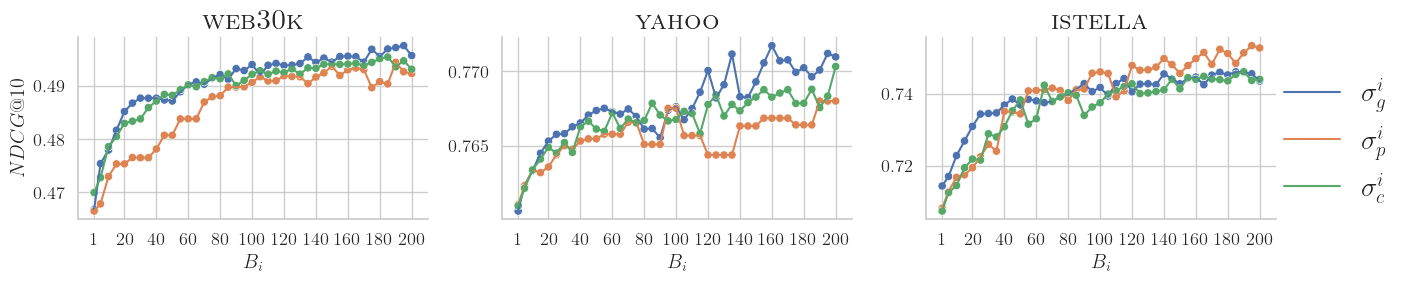

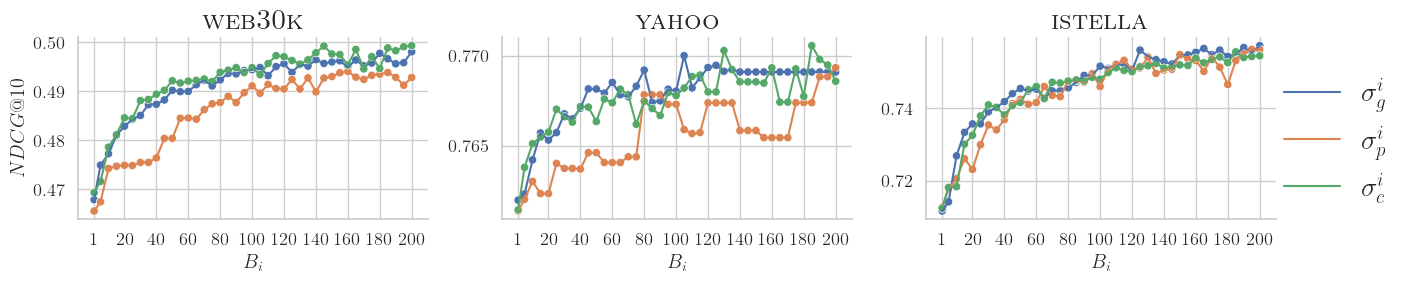

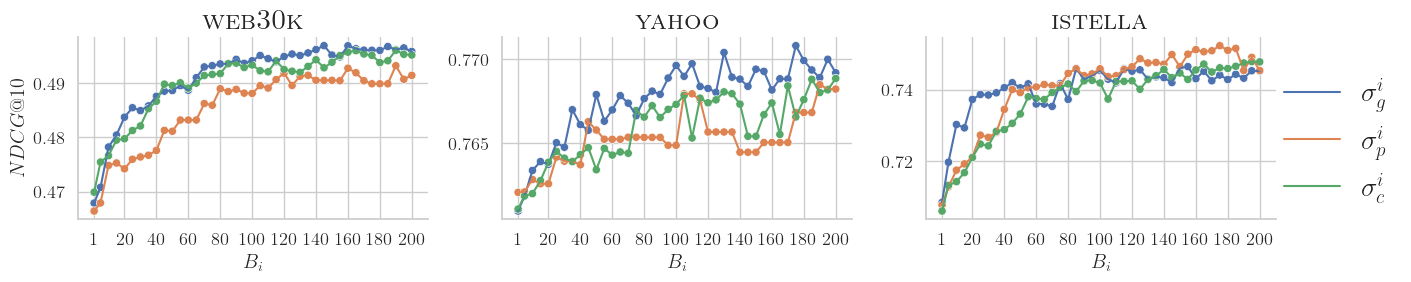

In [4]:
mapping_label_strategy_main = {"greedy": r"$\sigma_g^m$",
                               "prev": r"$\sigma_p^m$",
                               "contrib": r"$\sigma_c^m$"}
mapping_label_strategy_inter = {"greedy": r"$\sigma_g^i$",
                                "prev": r"$\sigma_p^i$",
                                "contrib": r"$\sigma_c^i$"}
df_ndgc_10 = df[df["cutoff"] == 10]
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
for main_strategy in ["greedy", "prev", "contrib"]:
    for subset in ["vali"]:
        df_to_plot = df_ndgc_10[
            (df_ndgc_10["subset"] == subset) & (df_ndgc_10["main_strategy"] == main_strategy)].copy()
        df_to_plot["inter_strategy"] = df_to_plot["inter_strategy"].map(mapping_label_strategy_inter)
        df_to_plot["main_strategy"] = df_to_plot["main_strategy"].map(mapping_label_strategy_main)
        g = sns.FacetGrid(df_to_plot, col="dataset", row="main_strategy", sharey="col", sharex=True, aspect=1.5,
                          margin_titles=True)
        g.map_dataframe(sns.scatterplot, x="budget", y="ndcg", hue="inter_strategy")
        g.map_dataframe(sns.lineplot, x="budget", y="ndcg", hue="inter_strategy")
        g.set(xticks=[1] + list(np.arange(20, 201, 20)))
        g.set_xlabels("$B_i$")
        g.set_ylabels("$NDCG@10$")
        g.add_legend()
        g.set_titles(col_template=r"\textsc{{{col_name}}}", row_template=r"", size=20)
        sns.move_legend(g, "right", ncol=1, fontsize=20)
        plt.savefig(f"./plots/inter_{subset}_{main_strategy}.pdf", bbox_inches='tight')

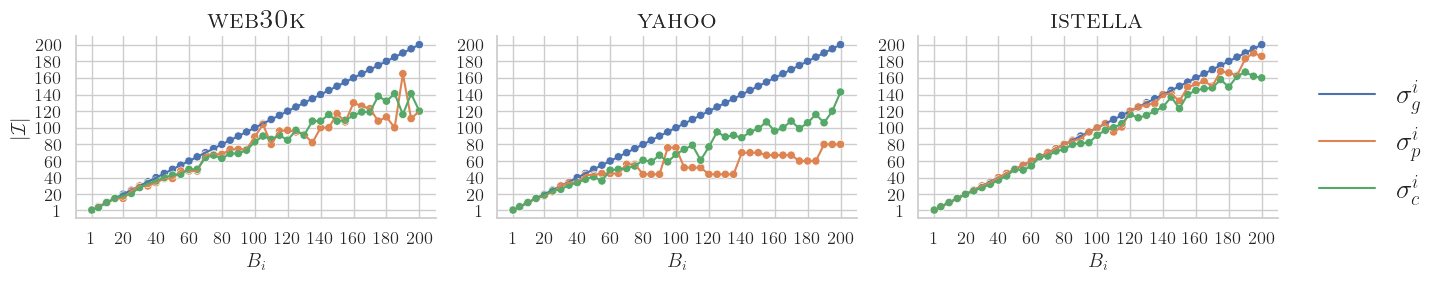

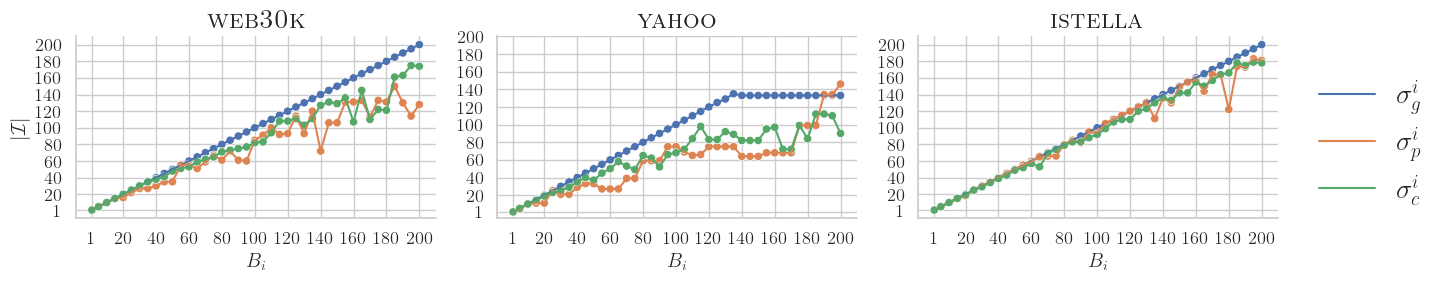

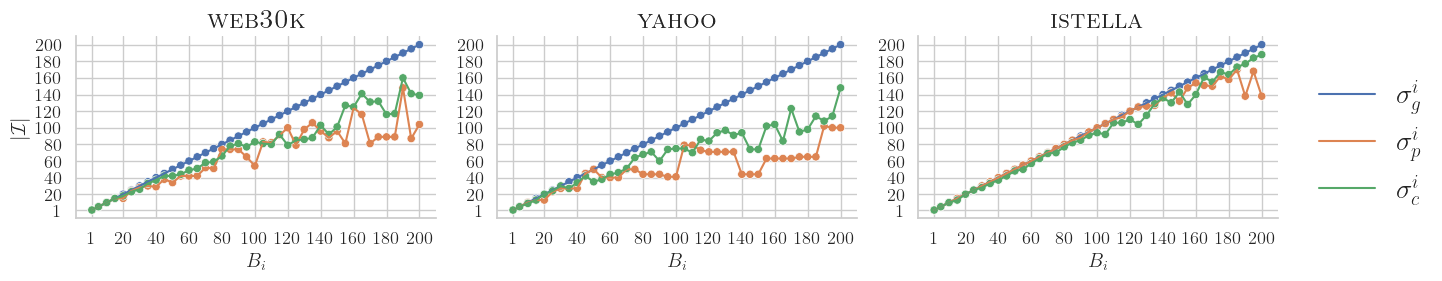

In [5]:
for main_strategy in ["greedy", "prev", "contrib"]:
    df_to_plot = df[(df["subset"] == "vali") & (df["cutoff"] == 1) & (df["main_strategy"] == main_strategy)].copy()
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")
    df_to_plot["inter_strategy"] = df_to_plot["inter_strategy"].map(mapping_label_strategy_inter)
    df_to_plot["main_strategy"] = df_to_plot["main_strategy"].map(mapping_label_strategy_main)
    g = sns.FacetGrid(df_to_plot, col="dataset", row="main_strategy", sharey=False, sharex=True, aspect=1.5,
                      margin_titles=True)
    g.map_dataframe(sns.scatterplot, x="budget", y="n_feature_used", hue="inter_strategy")
    g.map_dataframe(sns.lineplot, x="budget", y="n_feature_used", hue="inter_strategy")
    g.add_legend()
    g.set(xticks=[1] + list(np.arange(20, 201, 20)), yticks=[1] + list(np.arange(20, 201, 20)))

    g.set_xlabels("$B_i$")
    g.set_ylabels(r"$|\mathcal{I}|$")

    g.set_titles(col_template=r"\textsc{{{col_name}}}", row_template=r"", size=19)
    sns.move_legend(g, "right", ncol=1, fontsize=20, bbox_to_anchor=(1.02, 0.5))
    plt.savefig(f"./plots/inter_feat_used_{main_strategy}.pdf", bbox_inches='tight')

In [6]:
df[(df["subset"] == "vali") & (df["cutoff"] == 10) & (df["dataset"] == "istella")].sort_values("ndcg", ascending=False)

,dataset,budget,n_feature_used,ndcg,cutoff,main_strategy,inter_strategy,subset
5348,istella,200,200,0.757297,10,prev,greedy,vali
5204,istella,190,190,0.756774,10,prev,greedy,vali
5246,istella,165,165,0.756530,10,prev,greedy,vali
5558,istella,195,183,0.756258,10,prev,prev,vali
5594,istella,200,181,0.756181,10,prev,prev,vali
...,...,...,...,...,...,...,...,...
5966,istella,1,1,0.708574,10,contrib,greedy,vali
4736,istella,1,1,0.708176,10,greedy,prev,vali
6212,istella,1,1,0.707815,10,contrib,prev,vali
4982,istella,1,1,0.707393,10,greedy,contrib,vali
